Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

# Simulaciones numéricas y cálculo de probabilidades

En este cuaderno compararemos dos enfoques para calcular probabilidades:

- Simular el experimento mediante código informático, usando sólo las funciones elementales que generan números pseudo-aleatorios en el ordenador.
- Calcular las probabilidades a mano, de forma exacta, usando la teoría de probabilidades.

## Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función ``random``, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"*

In [2]:
random.random?

In [3]:
#Cada vez que ejecutamos este código obtenemos un número distinto
# en el intervalo [0,1)
random.random()

0.2502452068319414

In [4]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.3438709020077919
0.13844698811064604
0.46491914377982846
0.6910546405843383
0.8310960088020756
0.6977995632551451
0.9265370877553604
0.5721585828989213
0.5180318258644268
0.0649147996200845


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [5]:
for i in range(10):
    print (random.randint(10,20))

18
19
19
10
10
15
13
20
10
18


In [6]:
for i in range(10):
    print(random.choice('AEIOU'))

I
A
E
O
O
I
U
I
O
A


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactamente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [7]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
for i in range(10):
    print (random.randint(10,20))
for i in range(10):
    print(random.choice('AEIOU'))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631
16
16
19
10
17
14
13
19
11
15
A
A
A
U
A
O
E
O
A
U


#### Ejercicio
Comprueba que si usáis la misma semilla, obtenéis los mismos resultados que la pareja de al lado. Puedes incluso probar en una terminal de python 3 en tu ordenador de casa. No funciona con una terminal de python 2, parece que cambiaron el algoritmo...

## Simulaciones numéricas

Vamos a simular un ejercicio típico de probabilidad. Usaremos siempre el mismo enfoque:

 1. Escribimos una función aleatoria: *devuelve el resultado de simular el experimento una vez*. El resultado es distinto cada vez que llamamos a la función, y las distintas llamadas son **independientes** (por ahora nos conformaremos con una noción intuitiva de *independencia*: las llamadas son independientes porque el resultado de una llamada no nos ayuda a predecir el resultado de llamar una segunda vez). Es necesario ser capaces de simular el resultado del experimento usando las funciones del módulo ``random`` (más adelante estudiaremos otras opciones).
 2. Recogeremos una **muestra** de tamaño finito, llamando a la función anterior un número ``N`` de veces.
 3. Si queremos calcular la probabilidad de un *suceso A* , necesitaremos una función que recibe como argumento un elemento ``x`` del espacio muestral, y devuelve ``True``si ``x`` pertenece al suceso *A*, y ``False`` en caso contrario. Llamamos a esta función un __filtro__ para el suceso *A*.
 4. Nuestra *aproximación a la probabilidad del suceso A* es la *proporción* de elementos de la muestra que pertenecen a A

$$ P(A) \approx \frac{\text{nº de casos favorables}}{\text{tamaño de la muestra}}$$

El esqueleto del código es 

#### 1: Experimento aleatorio

Cada ejecución del experimento aleatorio devuelve un elemento del espacio muestral.

```python
def experimento():
    resultado = ... random ...
    return resultado
```

#### 2: Muestra aleatoria

Recopilamos la muestra aleatoria, ejecutando el experimento un número N de veces.

```python
#Cuanto mayor N, más trabajo para el ordenador, pero mejor aproximación
N = 1000
# muestra son N llamadas a la misma función, que cada vez devuelve un
#resultado distinto
muestra = [experimento() for _ in range(N)]
```


#### 3: Una función _"filtro"_ que caracteriza el suceso A

Devuelve True para los sucesos elementales que pertenecen al suceso A
```python
def es_suceso_A(resultado):
    if ... condicion ... :
        return True
    else:
        return False
```

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra

Aproximamos la probabilidad de A por la proporción  de elementos de A en la muestra: _sumamos 1 por cada elemento de la muestra que está en A_

```python
#Para cada elemento "e" de la muestra, es_suceso_A(e) es True
#si "e" pertenece a A. La suma de una secuencia de booleanos es la 
#cantidad de booleanos que son "True"
proporcion_A = sum(es_suceso_A(e) for e in muestra)

```

### Ejercicio resuelto: ejercicio 6 de la hoja 2

Se lanza un dado 10 veces. Calcular:

 - a) La probabilidad de obtener un único 6 en las 10 tiradas.
 - b) La probabilidad de obtener exactamente 2 seises.

In [8]:
resultados_dados = [random.randint(1,6) for n in range(10)]
resultados_dados

[2, 4, 4, 5, 2, 3, 2, 6, 2, 4]

In [9]:
#### 1: Experimento aleatorio
def tira_diez_dados_cuenta_seises():
    dados = [random.randint(1,6) for n in range(10)]
    cuenta_seis = sum(1 for dado in dados if dado==6)
    return cuenta_seis

In [10]:
#### 2: Muestra aleatoria

N = 10
muestra = [tira_diez_dados_cuenta_seises() for _ in range(N)]
print(muestra)

[3, 4, 0, 5, 1, 2, 1, 1, 2, 0]


In [11]:
#### 3: Una función _"filtro"_ que caracteriza el suceso A

def exactamente_un_seis(cuenta_seis):
    '''
    Función que recibe como argumento un numero del 0 al 10
    
    Devuelve True <=> el argumento es 1
    '''
    return (cuenta_seis==1)

In [12]:
#random.seed(12) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [tira_diez_dados_cuenta_seises() for _ in range(N)]

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra

prob = sum(1 for e in muestra if exactamente_un_seis(e))/N
print('Probabilidad aproximada de que haya un 6 entre los 10 dados:', prob)

Probabilidad aproximada de que haya un 6 entre los 10 dados: 0.307


Para hacer el apartado (b) no es necesario repetir el experimento ni la muestra. Sólo tenemos que definir un nuevo filtro para el evento "obtener exactamente 2 seises", y calcular _la proporción de elementos de la muestra que pasan el filtro_.

In [13]:
#### 3: Una función _"filtro"_ que caracteriza el suceso A

def exactamente_dos_seises(cuenta_seis):
    '''
    Función que recibe como argumento un numero del 0 al 10
    
    Devuelve True <=> el argumento es 2
    '''
    return (cuenta_seis==2)

In [14]:
#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra

prob = sum(1 for e in muestra if exactamente_dos_seises(e))/N
print('Probabilidad aproximada de que haya dos seises entre los 10 dados:', prob)

Probabilidad aproximada de que haya dos seises entre los 10 dados: 0.275


Comparamos con la probabilidad exacta, si ya la habéis visto en las clases de teoría...

In [15]:
import scipy.stats as st
B = st.binom(n=10, p=1/6)
B.pmf(1),B.pmf(2)

(0.32301116577969136, 0.2907100492017222)

### Ejercicio resuelto: ejercicio 10 de la hoja 1

Ejercicio 10 de la hoja PROB1. Se tienen dos urnas, y cada una de ellas contiene un número diferente de bolas blancas y rojas:

 - Primera urna, U1: 3 bolas blancas y 2 rojas;
 - Segunda urna, U2: 4 bolas blancas y 2 rojas.
 
Se realiza el siguiente experimento aleatorio: Se tira una moneda al aire y si sale cara se
elige una bola de la primera urna, y si sale cruz de la segunda. ¿Cuál es la probabilidad
de que salga una bola blanca?. (sol = 19/30)

In [18]:
#### 1: Experimento aleatorio
def experimento_urnas():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado puede ser 'B' (bola blanca) o 'R' (bola roja)
    '''
    urna = random.randint(1,2)
    if urna == 1:
        #Escogemos una bola.
        return random.choice('BBBRR')
    else:
        #Escogemos una bola. Las bolas son [B,B,B,B,R,R]
        return random.choice('BBBBRR')

In [19]:
for _ in range(10):
    bola = experimento_urnas()
    print(bola)

B
B
B
B
B
B
B
B
R
R


In [20]:
#### 2: Muestra aleatoria

N = 10
muestra = [experimento_urnas() for _ in range(N)]
print(muestra)

['B', 'R', 'B', 'B', 'B', 'B', 'B', 'B', 'R', 'B']


In [21]:
#### 3: Una función _"filtro"_ que caracteriza el suceso A

def es_bola_blanca(bola):
    '''
    Función que recibe como argumento un string, que puede ser
        "B" (representa una bola blanca)
        "R" (representa una bola roja)
    Devuelve True <=> el argumento es "B" (una bola blanca)
    '''
    return (bola=='B')

In [22]:
#### Código alternativo totalmente equivalente al anterior

def es_bola_blanca(bola):
    '''
    Función que recibe como argumento un string, que puede ser
        "B" (representa una bola blanca)
        "R" (representa una bola roja)
    Devuelve True <=> el argumento es "B" (una bola blanca)
    '''
    if bola=='B':
        return True
    else:
        return False

In [23]:
#random.seed(12) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [experimento_urnas() for _ in range(N)]

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra

prob = sum(1 for e in muestra if es_bola_blanca(e))/N
print('Probabilidad aproximada de bola blanca:', prob)

Probabilidad aproximada de bola blanca: 0.642


### Simulaciones numéricas vs cálculos exactos

Vamos a comparar el resultado con la probabilidad exacta obtenida usando las reglas de cálculo de probabilidades.

El resultado final puede ser una bola blanca de dos formas:

 - Sale cara, y después extraemos una bola blanca de la primera urna
 - Sale cruz, y después extraemos una bola blanca de la segunda urna


Ambos sucesos son incompatibles, y por tanto la probabilidad de bola blanca es la suma de las probabilidades de los dos eventos. Cada evento se compone de dos sucesos: un lanzamiento de moneda equilibrada y una extracción de bola en la que suponemos que todas las bolas son equiprobables. La **probabilidad total** de que salga bola blanca es la suma de las dos probabilidades

 - P(Cara) * P(Extraer bola blanca de la urna 1) = $\frac{1}{2}\frac{3}{5}$
 - P(Cruz) * P(Extraer bola blanca de la urna 2) = $\frac{1}{2}\frac{4}{6}$

$$
P(\text{bola blanca}) = 
\frac{1}{2}\frac{3}{5} + \frac{1}{2}\frac{4}{6} = 
\frac{1}{2}\left(\frac{3}{5} + \frac{4}{6}\right) = 
\frac{1}{2}\frac{18+20}{30} = 
\frac{1}{2}\frac{38}{30} = \frac{19}{30}
$$

In [24]:
#### 2: Muestra aleatoria
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [experimento_urnas() for _ in range(N)]

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra
prob = sum(es_bola_blanca(e) for e in muestra)/N
print('Probabilidad aproximada de bola blanca:', prob)
print('Probabilidad exacta de bola blanca:', 19/30)

Probabilidad aproximada de bola blanca: 0.604
Probabilidad exacta de bola blanca: 0.6333333333333333


### Ejercicio resuelto

Una urna contiene 5 bolas numeradas 1,2,3,4 y 5. Calcular la probabilidad de que al sacar 2 bolas **con** reposición la suma de los puntos sea impar.

In [25]:
#### 1: Experimento aleatorio

numeros1al5 = list(range(1,6))

def experimento_dos_bolas():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un par de números (las dos bolas)
    '''
    bola1 = random.choice(numeros1al5)
    bola2 = random.choice(numeros1al5)
    return [bola1, bola2]

In [26]:
experimento_dos_bolas()

[1, 4]

In [27]:
#### 3: Una función _"filtro"_ que caracteriza el suceso A
def suma_es_impar(bolas):
    return sum(bolas)%2 == 1

In [28]:
#### 2: Muestra aleatoria
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
N = 10000
muestra = [experimento_dos_bolas() for _ in range(N)]

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra
prob = sum(1 for e in muestra if suma_es_impar(e))/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)

Probabilidad aproximada de que la suma de los puntos sea impar: 0.4787


### Ejercicio 18 de la hoja PROB1

Una urna contiene 5 bolas numeradas 1,2,3,4 y 5. Calcular la probabilidad de que al sacar 2 bolas **sin** reposición la suma de los puntos sea impar. (sol = 0,6)

 - ¿Cómo podemos conseguir que extraiga dos bolas distintas?...

_...(hay más de una solución posible)._

In [ ]:
#### 1: Experimento aleatorio
numeros1al5 = range(1,6)

def experimento_dos_bolas_sin_reposicion():
    '''
    Función aleatoria que devuelve el resultado de simular el experimento *una vez*.
    El resultado es distinto cada vez que llamamos a la función.
    El resultado es un par de números (las dos bolas)
    '''
    # EJERCICIO: completa esta función
    b1 = 
    b2 = ...
    return (b1,b2)

In [ ]:
#### 2: Muestra aleatoria
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [experimento_dos_bolas_sin_reposicion() for _ in range(N)]
#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)

### Ejercicio 18

- Una urna contiene 5 bolas numeradas 1,2,3,4 y 5. Calcular la probabilidad de que al sacar 2 bolas con reposición la suma de los puntos sea impar. (sol = 0,48)
- Una urna contiene 5 bolas numeradas 1,2,3,4 y 5. Calcular la probabilidad de que al sacar 2 bolas sin reposición la suma de los puntos sea impar. (sol = 0,6)


In [30]:
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [experimento_dos_bolas() for _ in range(N)]
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)
print('Probabilidad exacta de que la suma de los puntos sea impar:', 12/25)

Probabilidad aproximada de que la suma de los puntos sea impar: 0.483
Probabilidad exacta de que la suma de los puntos sea impar: 0.48


In [ ]:
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [experimento_dos_bolas_sin_reposicion() for _ in range(N)]
prob = sum(suma_es_impar(e) for e in muestra)/N
print('Probabilidad aproximada de que la suma de los puntos sea impar:', prob)
print('Probabilidad exacta de que la suma de los puntos sea impar:', 3/5)

### Ejercicio: monedas

Aproxima mediante una simulación la probabilidad de que al lanzar 4 monedas salga una cantidad par de monedas. Repite el resultado para 5 monedas.

### Ejercicio: Cumplir años el mismo día

Un problema clásico:

- En un grupo de k personas: ¿cuál es la probabilidad de que haya al menos dos que cumplan año el mismo día?

Primero simulamos el experimento...

In [31]:
#### 1: Experimento aleatorio
def birthdays(k):
    '''
    birthdays(k) devuelve k fechas de cumpleaños (k números entre 1 y 365)
    '''
    return [random.randint(1,365) for _ in range(k)]

birthdays(10)

[5, 131, 278, 28, 157, 194, 8, 167, 174, 159]

Ahora tenemos que repetir el experimento N veces, para obtener N conjuntos de k cumpleaños cada uno, y contar cuántas veces ese conjunto tiene repeticiones.

Para comprobar si hay coincidencias, usamos una estructura de datos de python: el __conjunto (set)__. Es un contenedor de objetos sin repeticiones. Si construimos un conjunto con los elementos de una lista, desaparecen los elementos repetidos:

 - El conjunto tendrá menos elementos que la lista si y sólo si la lista tiene al menos un elemento repetido

In [32]:
#Ejemplos de conjuntos
print(set([1,2,3,1,7,8,9]))
print(set([1,1,1,1,2,2]))

{1, 2, 3, 7, 8, 9}
{1, 2}


In [33]:
#### 3: Una función _"filtro"_ que caracteriza el suceso A

def hay_coincidencia(bdays):
    '''Hay una coincidencia en la lista bdays si y solo si
    la longitud de la lista bdays después de eliminar repeticiones
    es menor que la longitud de la lista antes de eliminar repeticiones
    '''
    return len(set(bdays)) < len(bdays)

In [34]:
#Hay k personas en la habitación
k = 25
#### 2: Muestra aleatoria
random.seed(2) #Prueba a cambiar la semilla: la aproximación cambia 
N = 1000
muestra = [birthdays(k) for _ in range(N)]

#### 4: Aproximamos P(A) por la proporción de elementos de A en la muestra
prob = sum(hay_coincidencia(e) for e in muestra)/N
print('Probabilidad aproximada de que dos personas cumplan años el mismo día', prob)

Probabilidad aproximada de que dos personas cumplan años el mismo día 0.565


Dibujamos la proporción obtenida en las simulaciones para grupos de k personas, donde k varía desde 0 hasta 40 personas. Para ello es interesante crear una función ``proporcion_coincidencia`` que devuelve directamente una aproximación a la probabilidad de coincidencia en función del número de personas:

In [35]:
def proporcion_coincidencia(k, N=1000):
    muestra = [birthdays(k) for _ in range(N)]
    proporcion = sum(hay_coincidencia(e) for e in muestra)/N
    return proporcion

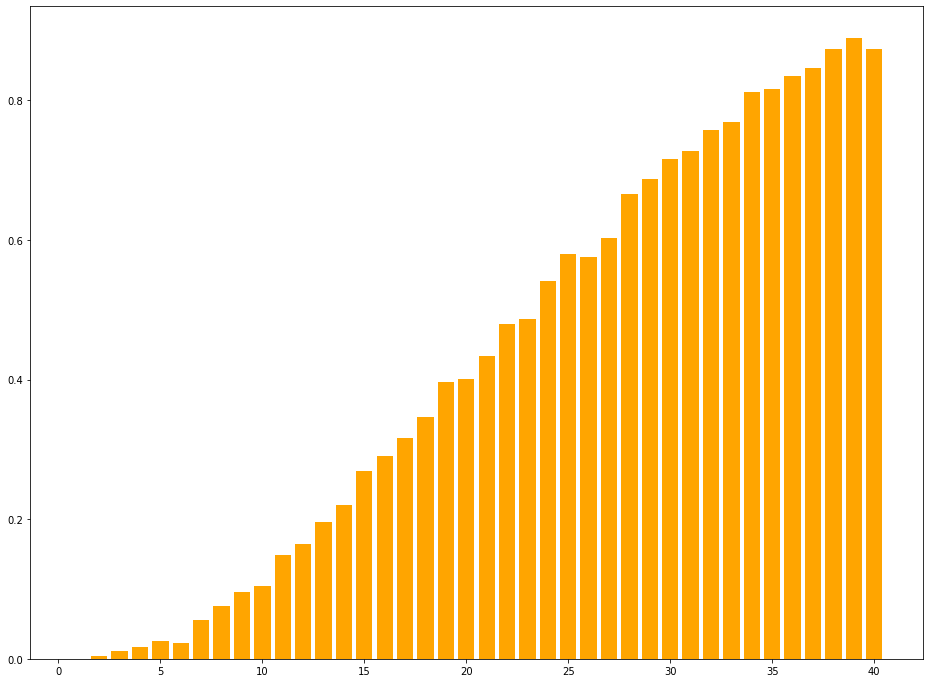

In [36]:
random.seed(1) #Prueba a cambiar la semilla: la aproximación cambia 
kmax = 40
plt.figure(figsize=(16, 12))
plt.bar(range(1,kmax+1),[proporcion_coincidencia(k) for k in range(1,kmax+1)], color='orange')
plt.show()

### Cálculos exactos para el problema de los cumpleaños

¿Has resuelto a mano el problema de los cumpleaños?
Si es así, ¿sabrías escribir código para calcular las probabilidades que aparecen en la solución teórica?

In [ ]:
def probabilidad_coincidencia(k):
    '''
    probabilidad_coincidencia(k) devuelve la probabilidad exacta de que en
    un grupo de k personas al menos dos cumplan años el mismo día
    '''
    return ???

In [ ]:
probabilidad_coincidencia(50)

In [ ]:
K = 40
plt.figure(figsize=(16, 12))
plt.bar(range(1,K+1),[probabilidad_coincidencia(k) for k in range(1,K+1)], fill=False, zorder=10)
plt.bar(range(1,K+1),[proporcion_coincidencia(k) for k in range(1,K+1)], color='orange')
plt.show()

## Glosario

 - **aleatorio**: *random*
 - **muestra**: *sample*
 - **semilla aleatoria**: *random seed*